# Lecture Notes: Machine Learning 3/31/24 Sunday

Titanic dataset: cbased on provided features in the titanic dataset, prepare the data and build a model to predict whether a passenger survived (Y/N)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib as plt 
import seaborn as sns 


C:\Users\chand\AppData\Local\Temp\ipykernel_22984\2175330812.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('titanic.txt')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary 
|Variable|	Definition	|Key
|--------|--------|--------|
|survival|	Survival	|0 = No, 1 = Yes
|pclass|	Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd
|sex|	Sex	|
|Age|	Age in years	|
|sibsp|	# of siblings / spouses aboard the Titanic	 |
|parch|	# of parents / children aboard the Titanic	|
|ticket|	Ticket number	|
|fare|	Passenger fare|
|cabin|	Cabin number	|
|embarked|	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton


In [5]:
#Description of data 
print(df.shape)
df.describe()

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Grab first names 
df['Name'].str.split(',').str[0]

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Missing values heatmap')

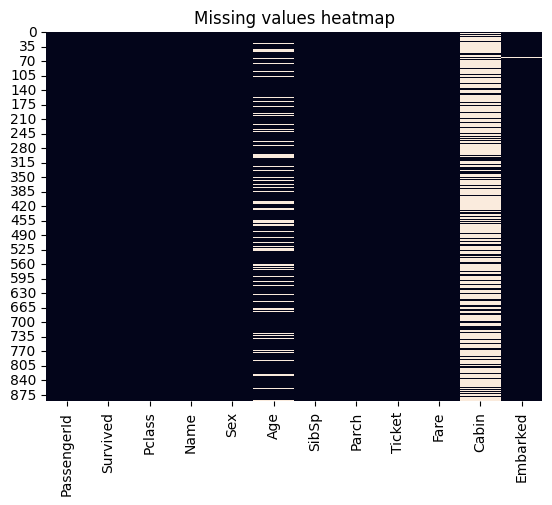

In [8]:
print(df.isna().sum())

sns.heatmap(df.isna(),cbar=False).set_title("Missing values heatmap")

In [9]:
df.loc[df['Fare']==0,'Pclass'].mean()

1.9333333333333333

### EDA

In [31]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: ylabel='Age'>

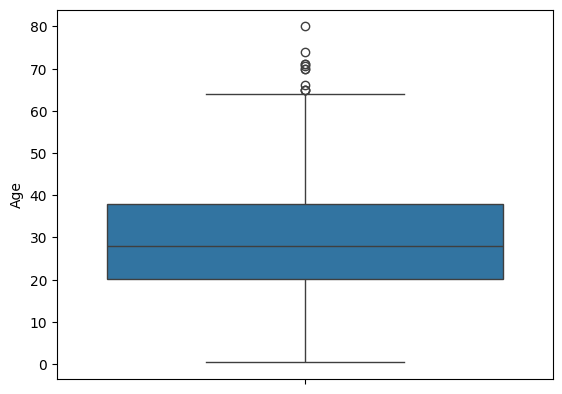

In [32]:
sns.boxplot(y=df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

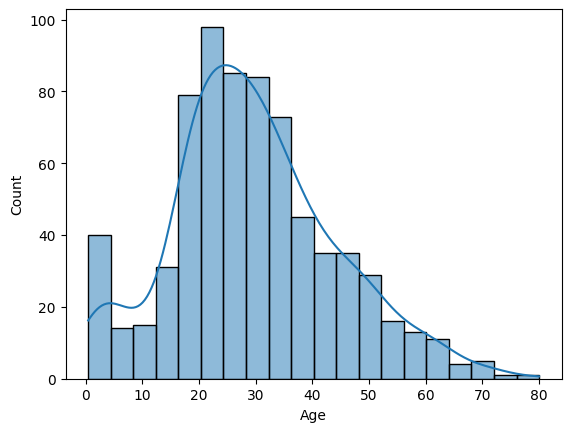

In [33]:
sns.histplot(x=df['Age'],kde=True)

In [34]:
df['Age'].skew()

0.38910778230082704

<Axes: xlabel='Embarked', ylabel='count'>

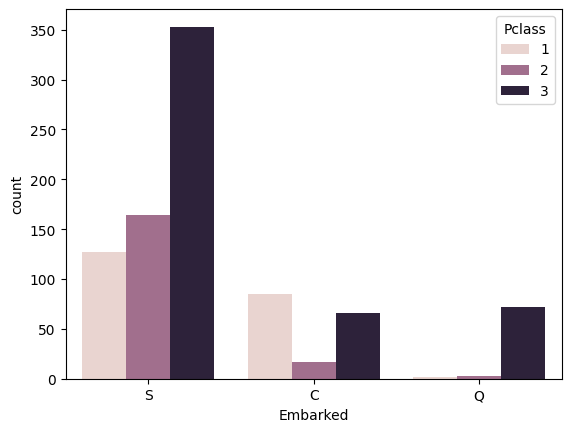

In [36]:
sns.countplot(x=df['Embarked'], hue=df['Pclass'])

<Axes: xlabel='Embarked', ylabel='count'>

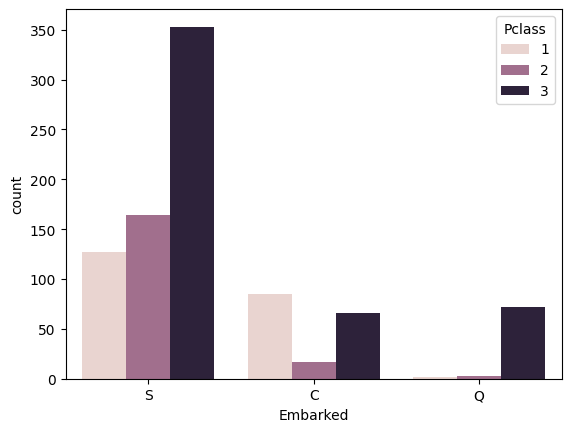

In [37]:
#different syntax
sns.countplot(data=df,x='Embarked',hue='Pclass')

<Axes: ylabel='Survived'>

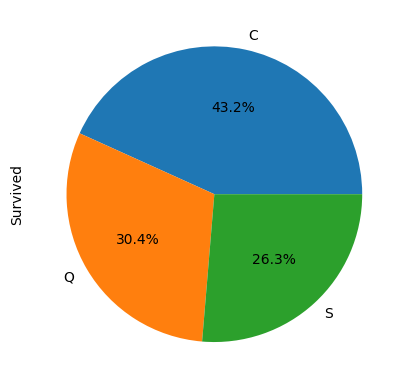

In [39]:
df.groupby('Embarked')['Survived'].mean().plot(kind='pie',autopct='%1.1f%%')

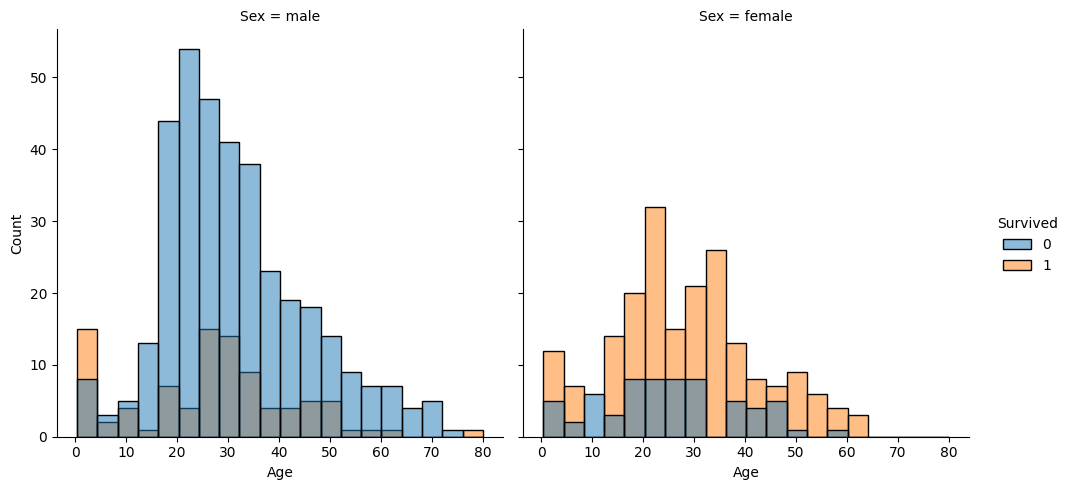

In [42]:
#evaluate if young, female, and seniors survived most 
sns.displot(x=df['Age'],col=df['Sex'],hue=df['Survived'])

<Axes: xlabel='Survived', ylabel='count'>

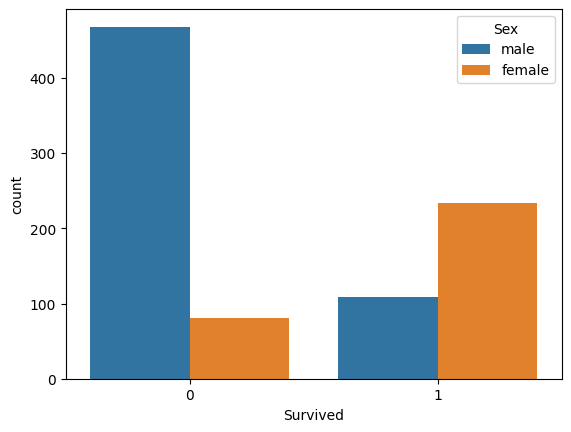

In [43]:
sns.countplot(x=df['Survived'],hue=df['Sex'])

In [44]:
#Calculate population proportion of males:
total_males = len(df[df['Sex']=='male']) 
total_males

577

In [48]:
#proportion of surviving males 
mask = (df['Sex']=='male') & (df['Survived']==1)
total_surv_males = len(df[mask])
total_surv_males
print(f'Percentagge of surviving males: {total_surv_males/total_males:.2%}')

Percentagge of surviving males: 18.89%


In [49]:
df.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

In [56]:
val_m = df.groupby('Sex')['Survived'].value_counts(normalize=True)[3]
val_f = df.groupby('Sex')['Survived'].value_counts(normalize=True)[0]

print(f'Percent of surviving males: {val_m:.2%}')
print(f'Percent of surviving females: {val_f:.2%}')


Percent of surviving males: 18.89%
Percent of surviving females: 74.20%


C:\Users\chand\AppData\Local\Temp\ipykernel_22984\4116127055.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val_m = df.groupby('Sex')['Survived'].value_counts(normalize=True)[3]
C:\Users\chand\AppData\Local\Temp\ipykernel_22984\4116127055.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val_f = df.groupby('Sex')['Survived'].value_counts(normalize=True)[0]


In [57]:
#Percent of surviving children 
print(f"{(df[df['Age'] <=12]['Survived'].mean()):.2%} of children survived")

57.97% of children survived


In [59]:
total_children = len(df[df['Age'] <=12])
total_children

69

In [60]:
total_children_surv = len(df[(df['Age'] <= 12) & (df['Survived']==1)])
total_children_surv/total_children

0.5797101449275363

In [61]:
df[df['Age'] <= 12]['Embarked'].value_counts(normalize=True)

Embarked
S    0.782609
C    0.159420
Q    0.057971
Name: proportion, dtype: float64

<Axes: ylabel='Pclass'>

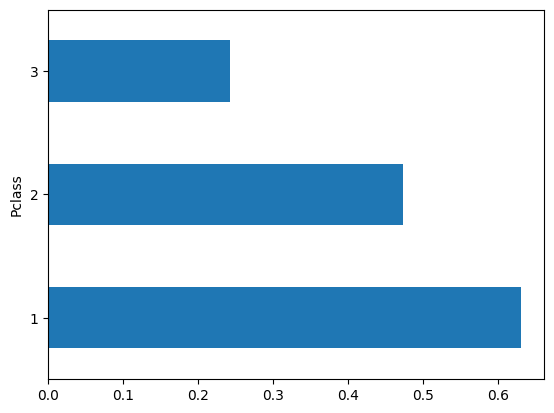

In [62]:
# evaluate if the 1st class people got a special treatment aka survived more than the rest of the classes
df.groupby('Pclass')['Survived'].mean().plot(kind='barh')

### Binning 
- cut function is the best way to go

In [24]:
#this method creates categories with equal number of observations per group
df['Agebin1'] = df['Age'].value_counts(bins=5)

In [29]:
#The 'cut' method let's you create groups based on the values 
df['AgeBin'] = pd.cut(df["Age"]
                      , bins =[0,12,18,65,99]
                      ,labels=["Under 12","12-18","19-65","65+"])

In [52]:
df.groupby('AgeBin')['Age'].value_counts(normalize=True)

C:\Users\chand\AppData\Local\Temp\ipykernel_22984\467583499.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeBin')['Age'].value_counts(normalize=True)


AgeBin    Age 
Under 12  2.0     0.144928
          4.0     0.144928
          9.0     0.115942
          1.0     0.101449
          3.0     0.086957
                    ...   
65+       61.0    0.000000
          62.0    0.000000
          63.0    0.000000
          64.0    0.000000
          65.0    0.000000
Name: proportion, Length: 352, dtype: float64

In [25]:
df['Agebin1'].value_counts()

Agebin1
100.0    16
346.0    16
188.0    16
69.0     16
11.0     16
Name: count, dtype: int64

In [30]:
pd.crosstab(df['Age'],df['Agebin'])

Agebin,11.0,69.0,100.0,188.0,346.0
Age,,,,,
0.83,1,0,0,0,0
2.00,0,0,2,0,0
3.00,0,0,0,1,0
4.00,0,1,1,0,0
5.00,0,1,0,0,0
7.00,0,1,0,0,0
8.00,0,0,0,0,1
11.00,0,1,0,0,0
14.00,0,0,2,1,0
